In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("phishing_data.csv")
df.head(10)

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1
5,-1,-1,1,-1,-1,1,0,-1,0,1
6,1,-1,0,1,-1,0,0,1,0,-1
7,1,0,1,1,0,0,0,1,1,-1
8,-1,-1,0,-1,-1,-1,-1,1,0,0
9,-1,0,-1,-1,1,1,0,-1,0,1


In [3]:
df.describe()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


array([[<AxesSubplot: title={'center': 'SFH'}>,
        <AxesSubplot: title={'center': 'popUpWidnow'}>,
        <AxesSubplot: title={'center': 'SSLfinal_State'}>],
       [<AxesSubplot: title={'center': 'Request_URL'}>,
        <AxesSubplot: title={'center': 'URL_of_Anchor'}>,
        <AxesSubplot: title={'center': 'web_traffic'}>],
       [<AxesSubplot: title={'center': 'URL_Length'}>,
        <AxesSubplot: title={'center': 'age_of_domain'}>,
        <AxesSubplot: title={'center': 'having_IP_Address'}>],
       [<AxesSubplot: title={'center': 'Result'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

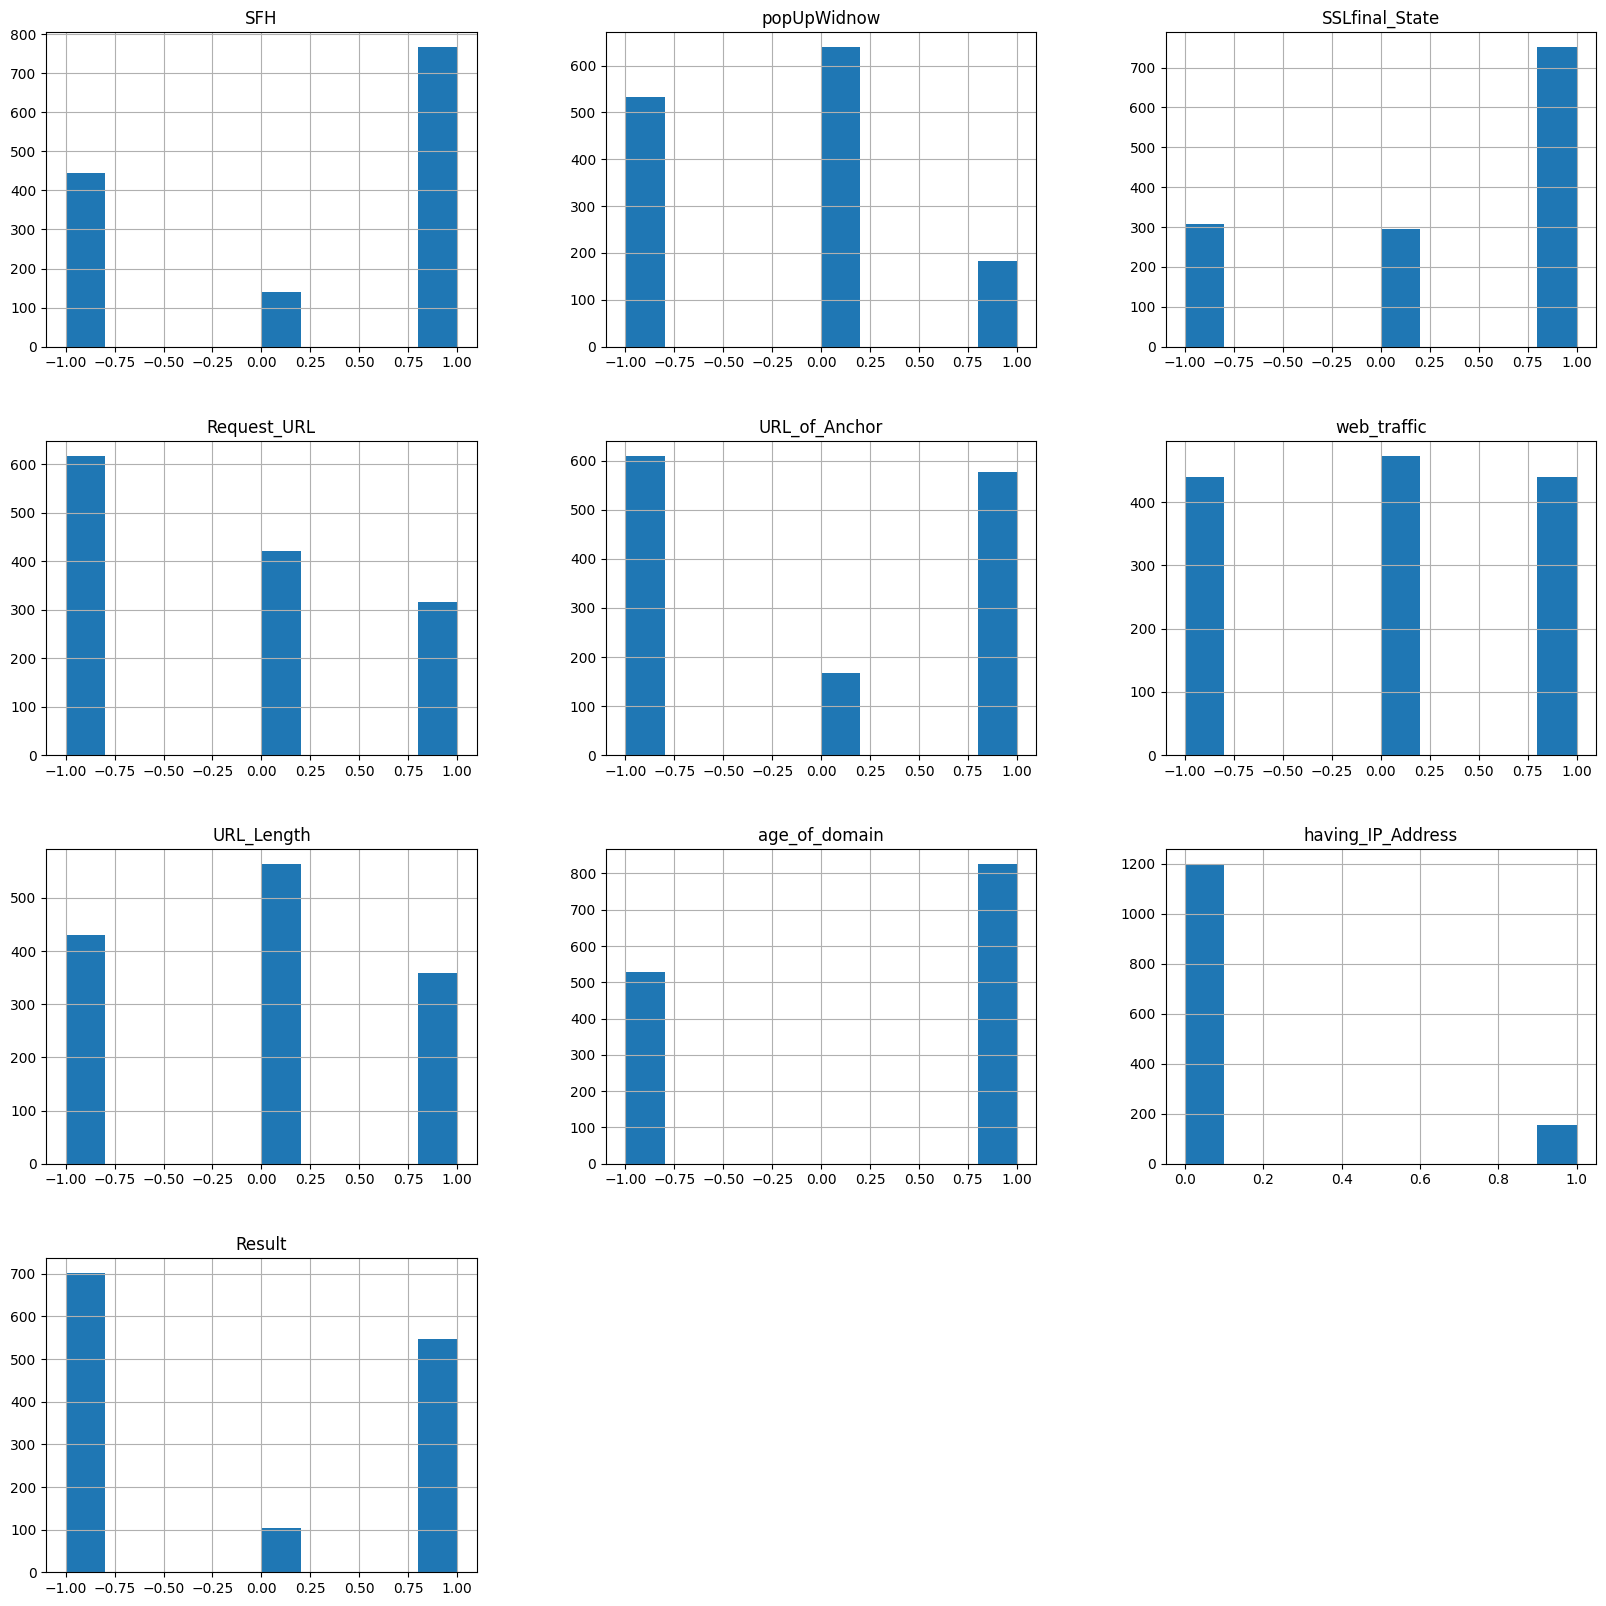

In [9]:
df.hist(figsize=(20, 20))

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm

In [15]:
train, test = train_test_split(df, test_size = 0.2, random_state = 42)

In [17]:
trainX = train.drop(['Result'], axis=1)
trainX.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address
966,-1,-1,-1,-1,1,1,-1,-1,0
932,1,0,1,1,1,1,0,1,0
109,-1,-1,0,-1,-1,0,1,-1,1
714,0,0,1,0,1,-1,0,1,1
1200,-1,0,1,-1,-1,0,-1,-1,0


In [19]:
trainY = train.Result
trainY.head()

966     1
932    -1
109     1
714     1
1200    1
Name: Result, dtype: int64

In [20]:
testX = test.drop(['Result'], axis=1)
testX.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address
49,1,1,-1,-1,1,-1,1,1,0
638,-1,-1,0,-1,-1,1,-1,-1,0
1033,1,0,1,-1,1,-1,0,1,0
746,1,0,1,1,1,-1,0,1,0
918,-1,-1,1,-1,-1,0,0,1,0


In [21]:
testY = test.Result
testY.head()

49      0
638     1
1033   -1
746    -1
918     1
Name: Result, dtype: int64

### Radial Basis Function

In [25]:
svmRBF = svm.SVC(kernel='rbf', C=1, decision_function_shape='ovo').fit(trainX, trainY)
svmPrediction = svmRBF.predict(testX)
print(svmRBF.score(testX, testY))

0.8265682656826568


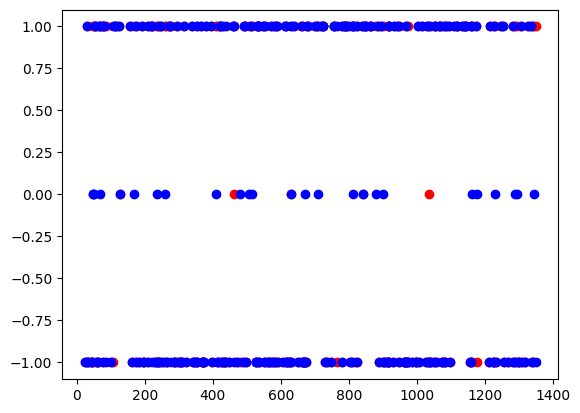

In [28]:
plt.scatter(testX.index.values, svmPrediction, color='red')
plt.scatter(testX.index.values, testY, color='blue')

### Polynomial

In [26]:
svmPoly = svm.SVC(kernel='poly', C=1, decision_function_shape='ovo').fit(trainX, trainY)
svmPolyPrediction = svmPoly.predict(testX)
print(svmPoly.score(testX, testY))

0.8450184501845018


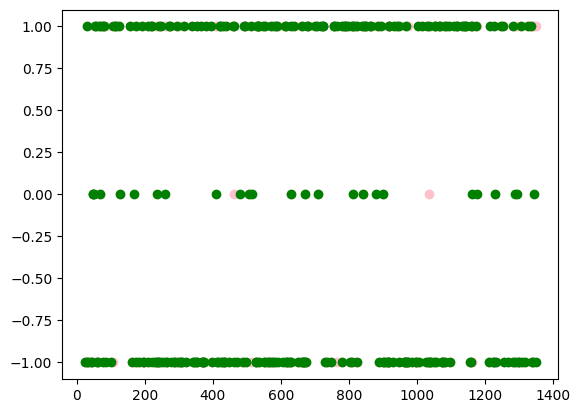

In [29]:
plt.scatter(testX.index.values, svmPolyPrediction, color='pink')
plt.scatter(testX.index.values, testY, color='green')

In [34]:
polyPrediction = svmPoly.predict([[1, 1, -1, -1, 1, -1, 1, 1, 0]])
print(polyPrediction[0])
polyPrediction = svmPoly.predict([[-1, -1, 0, -1, -1, 1, -1, -1, 0]])
print(polyPrediction[0])

0
1


/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
